# Práctica 6

In [25]:
!pip install numpy==1.24.4
!pip install gensim

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import word2vec, FastText
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from google.colab import drive

In [44]:
np.random.seed(1989) # viva taylor swift <3

# funcion que grafica una lista de vectores de los indices dados, obtiene su etiqueta del modelo original y la pone en la gráfica
def plot_reduced_vectors(vectors, indices, model):
    plt.figure(figsize=(19,10))
    plt.scatter(vectors[:, 0], vectors[:, 1], s=3)
    words = [model.wv.index_to_key[i] for i in indices]
    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors[i, 0], vectors[i, 1]), fontsize=8)

    plt.show()

In [28]:
################# CARGA DEL MODELO ######################
"""
  para obenter los archivos monté mi carpeta de drive en colab y en mi unidad creé una carpeta llamada models, ahí copié el de skip gram 500 que fue el que usé pero se puede
  cambiar la ruta en la variable que dice file name dependiendo de si se ponen los archivos directo en colab en otro lugar
  no los subo porque creo que no es necesario pero se debenn cambiar la ruta de los archivos para que funcione, deben estar los 3 archivos del modelo porque si no no va a funcionar:
  - eswiki-large-vs500-w6-SKIP_GRAM.model.wv.vectors
  - eswiki-large-vs500-w6-SKIP_GRAM.model.syn1neg
  - eswiki-large-vs500-w6-SKIP_GRAM.model
"""

#drive.mount('/content/drive') # descomentar esta línea si se quiere montar drive para acceder a los archivos

filename = "drive/MyDrive/models/eswiki-large-vs500-w6-SKIP_GRAM.model"
try:
    print("Cargando modelo...")
    model = word2vec.Word2Vec.load(filename)
    model.save(filename)
    print("Listo! :)")
except Exception as e:
    print(f"Modelo {filename} no encontrado", e)

Cargando modelo...
Listo! :)


In [29]:
############ ELEGIR VECTORES AL AZAR #############
num_ind = 100
indices = np.random.choice(model.wv.vectors.shape[0], num_ind, replace=False)
vectors = model.wv.vectors[indices]

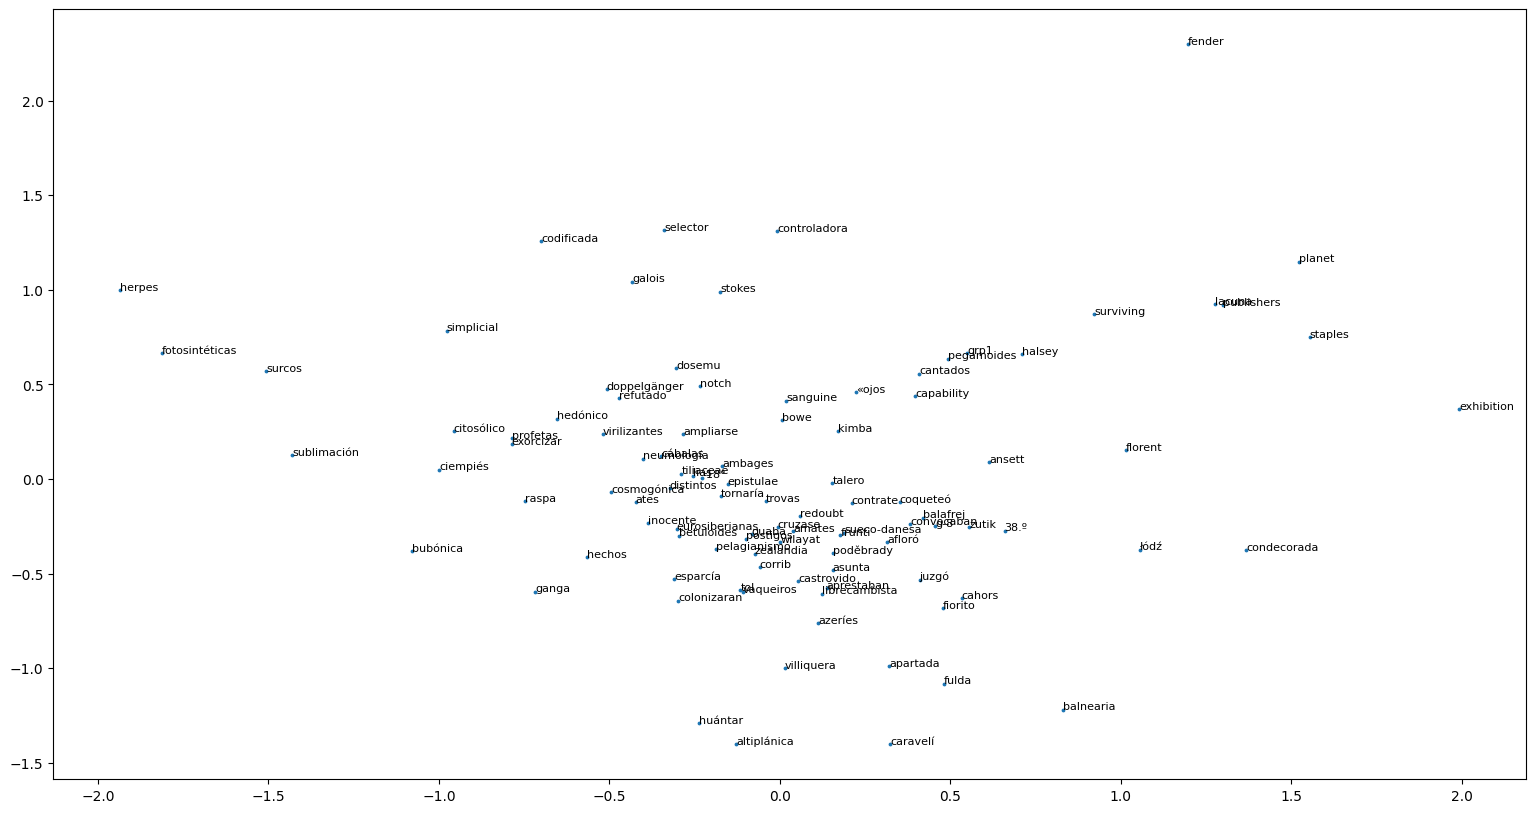

In [45]:
############ PCA #############
pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(vectors)
plot_reduced_vectors(pca_vectors, indices, model)

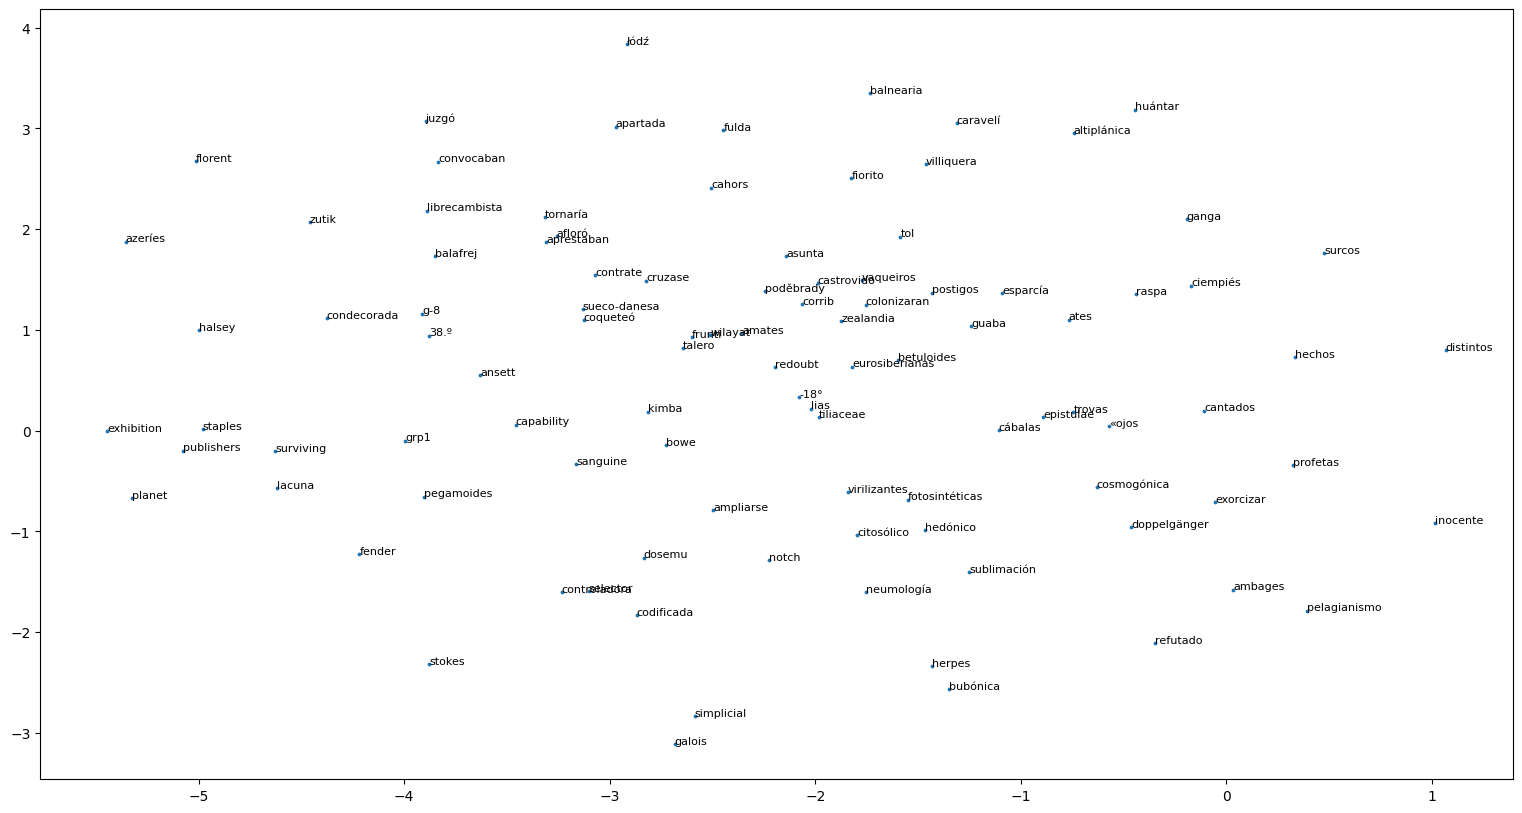

In [46]:
############ TNSE #############
tsne = TSNE(n_components=2)
tsne_vectors = tsne.fit_transform(vectors)
plot_reduced_vectors(tsne_vectors, indices, model)

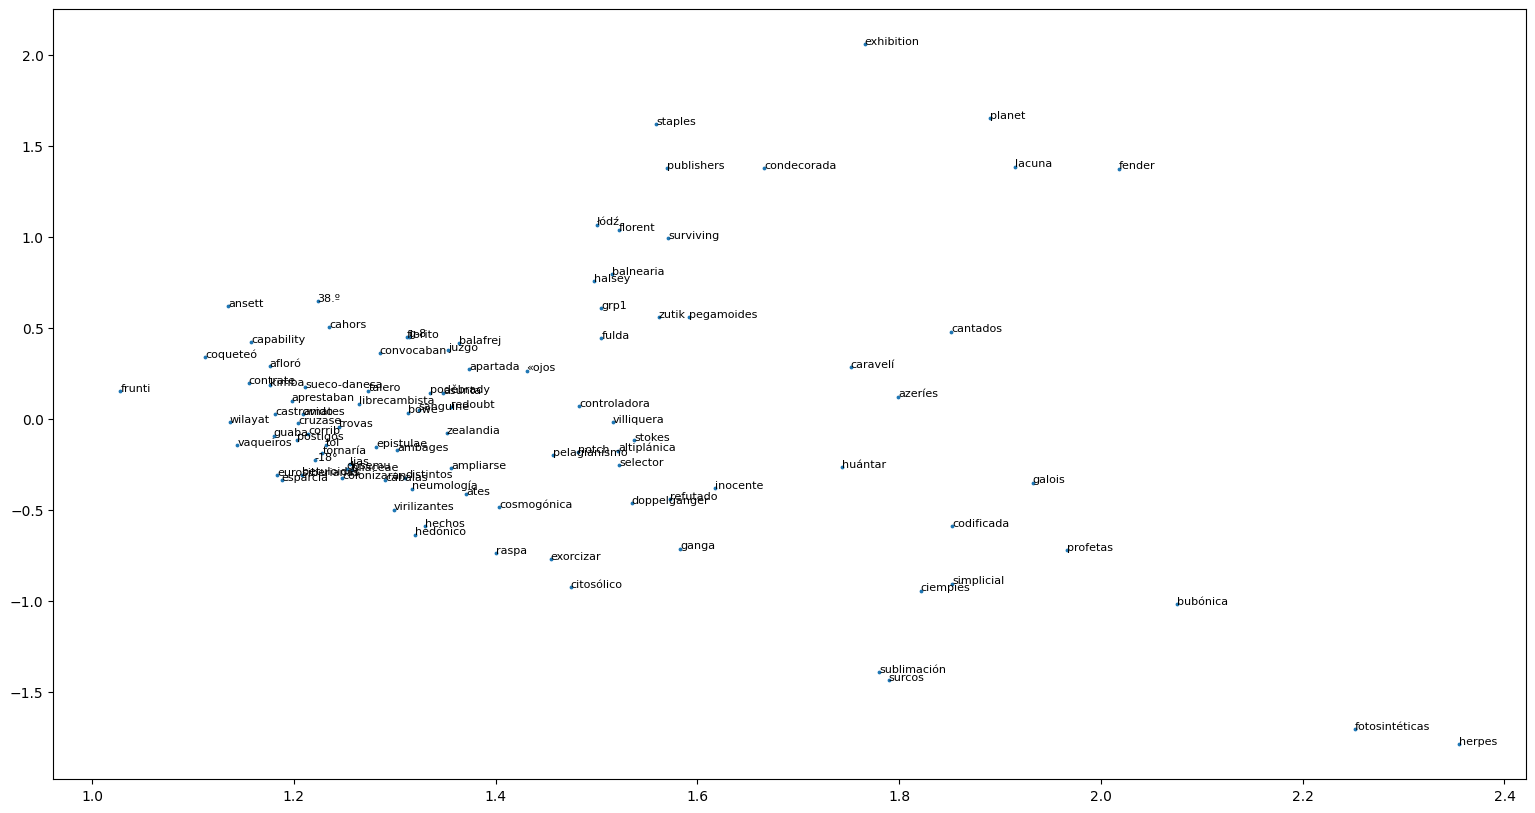

In [47]:
############ SVD #############
svd = TruncatedSVD(n_components=2)
svd_vectors = svd.fit_transform(vectors)
plot_reduced_vectors(svd_vectors, indices, model)

### Analizar y comparar las topologías que se generan con cada algoritmo

Después de realizar varias pruebas con diferentes muestras de palabras noté que cuando aplicamos el agoritmo TNSE los vectores se ven distribuidos más uniformemente en todo el espacio que cuando se aplican los otros dos métodos de reducción, como que en SVD y PCA se concentran más las palabras en una sección pequeña del plano, y considero que se capturan similitudes que no son del todo ciertas. Algo que me parecio interesante es que las distancias entre los vectores cambiaban un poco con los diferentes métodos.